ASSIGNMENT : SOLAR ENERGY DATASET 

In [3]:
import numpy as np
import pandas as pd

df = pd.read_excel("solar_Weather_Assignment.xlsx")

In [4]:
df.head()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,2017-01-01 00:00:00,0,0,1.6,0,100,450
1,2017-01-01 00:15:00,0,0,1.6,0,100,450
2,2017-01-01 00:30:00,0,0,1.6,0,100,450
3,2017-01-01 00:45:00,0,0,1.6,0,100,450
4,2017-01-01 01:00:00,0,0,1.7,0,100,450


In [5]:
df.shape

(196777, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Time                        196777 non-null  object
 1   Energy Captured[Wh]         196777 non-null  object
 2   Sun Light Intensity (W/m2)  196777 non-null  object
 3   Temperature                 196777 non-null  object
 4   1 Hour Rain Fall            196777 non-null  object
 5   Cloud Coverage              196777 non-null  object
 6   Length of Day_Light         196777 non-null  object
dtypes: object(7)
memory usage: 10.5+ MB


CONVERTING DATA TYPES FOR SPECIFIC COLUMNS

In [12]:
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df["Energy Captured[Wh]"] = pd.to_numeric(df["Energy Captured[Wh]"], errors="coerce")
df["Sun Light Intensity (W/m2)"] = pd.to_numeric(df["Sun Light Intensity (W/m2)"], errors = "coerce")
df["Temperature"] = pd.to_numeric(df["Temperature"], errors= "coerce")
df["1 Hour Rain Fall"] = pd.to_numeric(df["1 Hour Rain Fall"], errors="coerce")
df["Cloud Coverage"] = pd.to_numeric(df["Cloud Coverage"], errors="coerce")
df["Length of Day_Light"] = pd.to_numeric(df["Length of Day_Light"], errors="coerce")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196769 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196773 non-null  float64       
 2   Sun Light Intensity (W/m2)  196770 non-null  float64       
 3   Temperature                 196771 non-null  float64       
 4   1 Hour Rain Fall            196773 non-null  float64       
 5   Cloud Coverage              196764 non-null  float64       
 6   Length of Day_Light         196772 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.5 MB


In [14]:
df.isna().sum()

Time                           8
Energy Captured[Wh]            4
Sun Light Intensity (W/m2)     7
Temperature                    6
1 Hour Rain Fall               4
Cloud Coverage                13
Length of Day_Light            5
dtype: int64

In [15]:
df[df["Time"].isnull()]

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
355,NaT,0.0,0.0,0.3,0.0,71.0,465.0
402,NaT,0.0,0.0,-2.5,0.0,55.0,465.0
583,NaT,0.0,0.0,2.3,0.0,96.0,465.0
638,NaT,0.0,0.0,1.9,0.0,47.0,465.0
666,NaT,0.0,0.0,0.8,0.0,100.0,465.0
716,NaT,123.0,8.8,0.1,0.0,97.0,465.0
801,NaT,56.0,6.6,-2.4,0.0,86.0,480.0
933,NaT,0.0,0.0,-0.2,0.0,61.0,480.0


Forward filling with Previous Dates and Adding 15 Minutes 

In [19]:
df['Time'] = df['Time'].fillna(method='ffill') + pd.to_timedelta(
    df['Time'].isna().cumsum() * 15, unit='min'
)


C:\Users\renuk\AppData\Local\Temp\ipykernel_33276\3542589170.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time'] = df['Time'].fillna(method='ffill') + pd.to_timedelta(


In [22]:
df.isna().sum()

Time                           0
Energy Captured[Wh]            4
Sun Light Intensity (W/m2)     7
Temperature                    6
1 Hour Rain Fall               4
Cloud Coverage                13
Length of Day_Light            5
dtype: int64

Dropping the rows where Energy Captured is Null,because it is a target

In [24]:
df = df.dropna(subset=['Energy Captured[Wh]'])

FORWARD FILLING THE REMAINING NULL VALUES OF A PARTICULAR COLUMNS

In [27]:
weather_cols = [
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

df[weather_cols] = df[weather_cols].ffill()

C:\Users\renuk\AppData\Local\Temp\ipykernel_33276\2984301093.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weather_cols] = df[weather_cols].ffill()


In [28]:
df.isna().sum()

Time                          0
Energy Captured[Wh]           0
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
dtype: int64

Duplicate Rows based on Time

In [ ]:
df[df.duplicated(subset=['Time'], keep=False)]

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
138,2017-01-02 10:30:00,101.0,5.3,2.2,0.0,79.0,450.0
139,2017-01-02 10:30:00,101.0,5.3,2.2,0.0,79.0,450.0


REMOVE DUPLICATE BASED ON TIME, BECAUSE TIME APPEARS ONLY ONCE BASED ON 15 MINUTE INTERVAL

In [35]:
df = df.drop_duplicates(subset=['Time'], keep='first')

Number of TIMESTAMPS ARE MISSING 

In [37]:
df = df.sort_values('Time')
df = df.set_index('Time')

expected_time = pd.date_range(
    start=df.index.min(),
    end=df.index.max(),
    freq='15min'
)

missing_timestamps = expected_time.difference(df.index)

print("Number of missing timestamps:", len(missing_timestamps))
missing_timestamps


Number of missing timestamps: 1836


DatetimeIndex(['2017-01-04 16:45:00', '2017-01-05 00:15:00',
               '2017-01-05 00:30:00', '2017-01-05 00:45:00',
               '2017-01-05 01:00:00', '2017-01-05 01:15:00',
               '2017-01-05 01:30:00', '2017-01-05 01:45:00',
               '2017-01-05 02:00:00', '2017-01-05 02:15:00',
               ...
               '2022-02-20 23:30:00', '2022-02-20 23:45:00',
               '2022-02-21 00:00:00', '2022-02-21 00:15:00',
               '2022-02-21 00:30:00', '2022-02-21 00:45:00',
               '2022-02-21 01:00:00', '2022-02-21 01:15:00',
               '2022-02-21 01:30:00', '2022-02-21 01:45:00'],
              dtype='datetime64[ns]', length=1836, freq=None)

In [42]:
df.describe()

,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
count,196772.000000,196772.000000,196772.000000,196772.000000,196772.000000,196772.000000
mean,573.013660,32.598073,9.790741,0.066036,65.971962,748.649884
std,1044.834501,52.175264,7.995331,0.278916,36.636927,194.868311
min,-54.000000,0.000000,-16.600000,0.000000,-250.000000,450.000000
25%,0.000000,0.000000,3.600000,0.000000,34.000000,570.000000
50%,0.000000,1.600000,9.300000,0.000000,82.000000,765.000000
75%,577.000000,46.800000,15.700000,0.000000,100.000000,930.000000
max,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.000000


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
columns = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

corr_matrix = df[columns].corr()


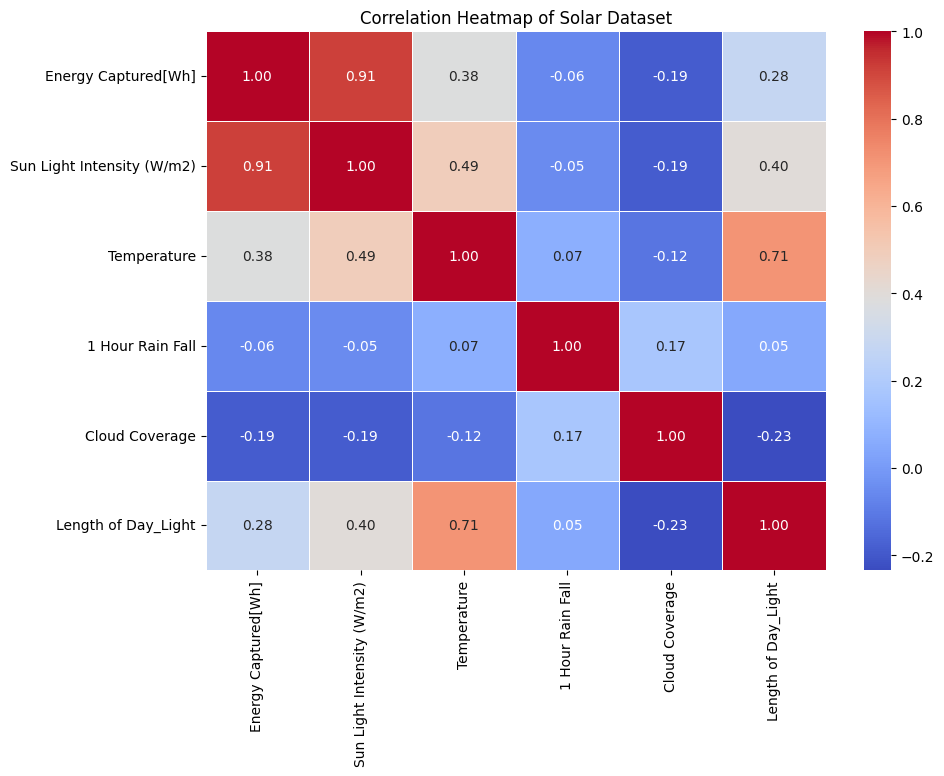

In [45]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Solar Dataset")
plt.show()


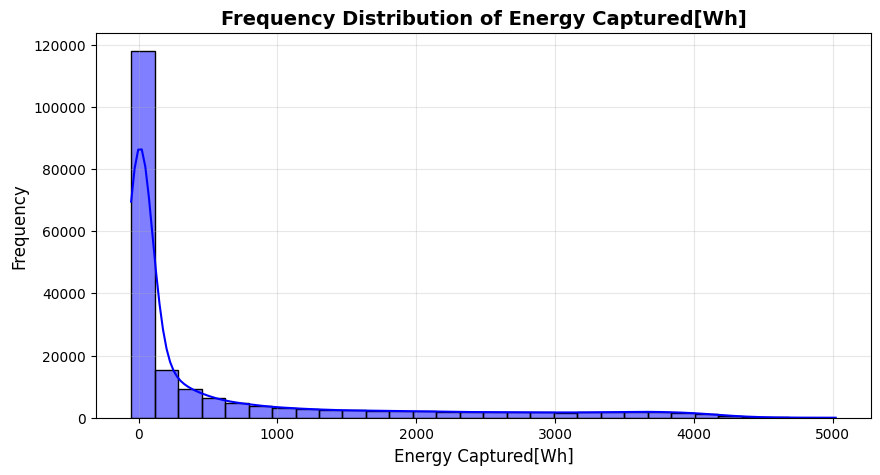

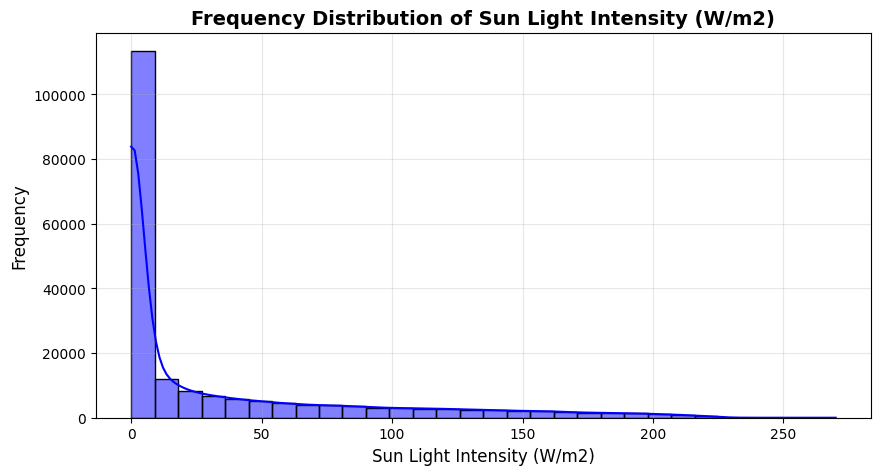

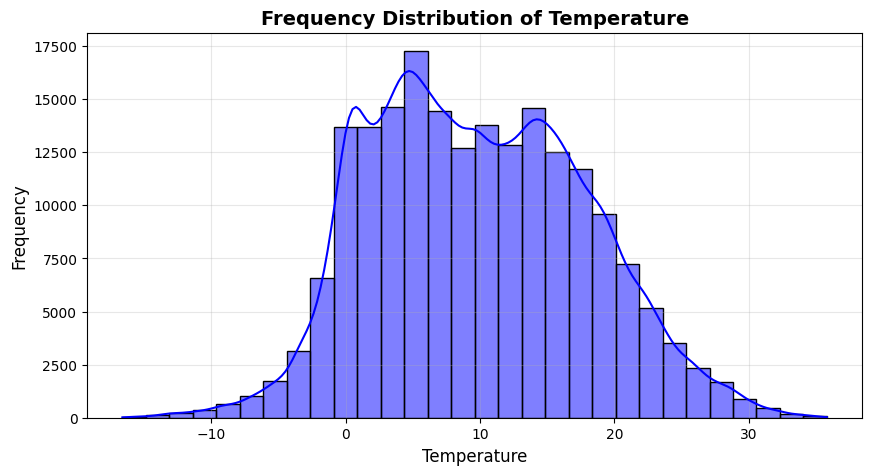

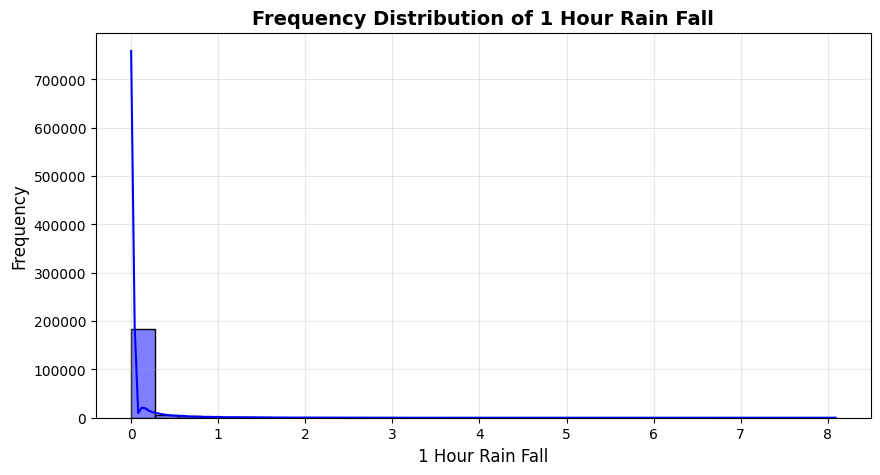

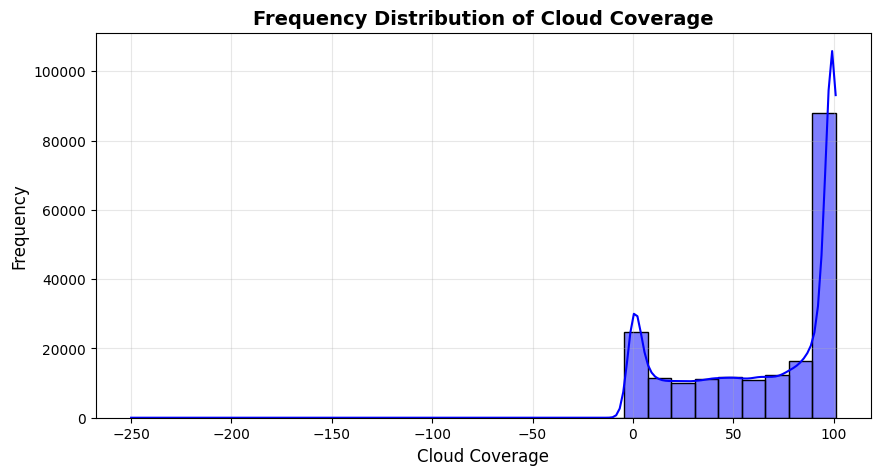

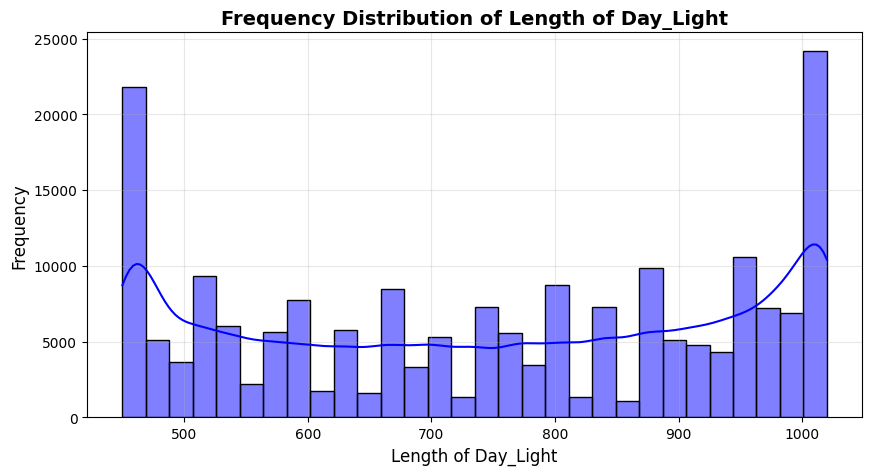

In [48]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Frequency Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()



ENERGY CAPTURED BASED ON HOURS IN A DAY

In [52]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')[columns].mean()


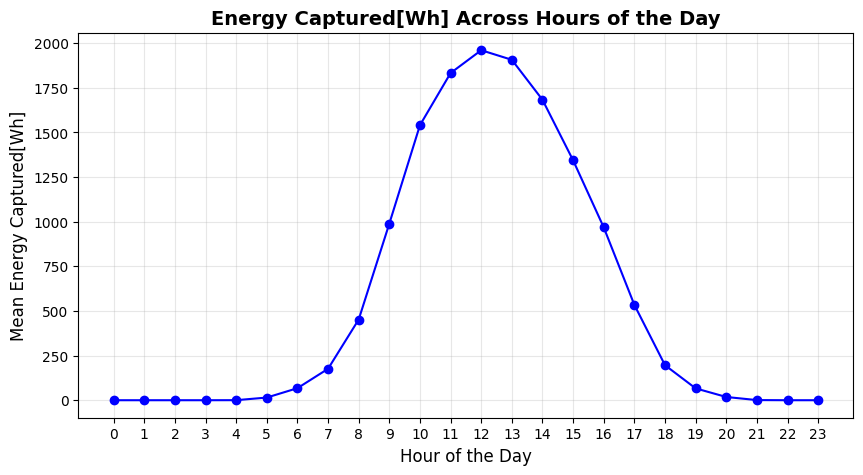

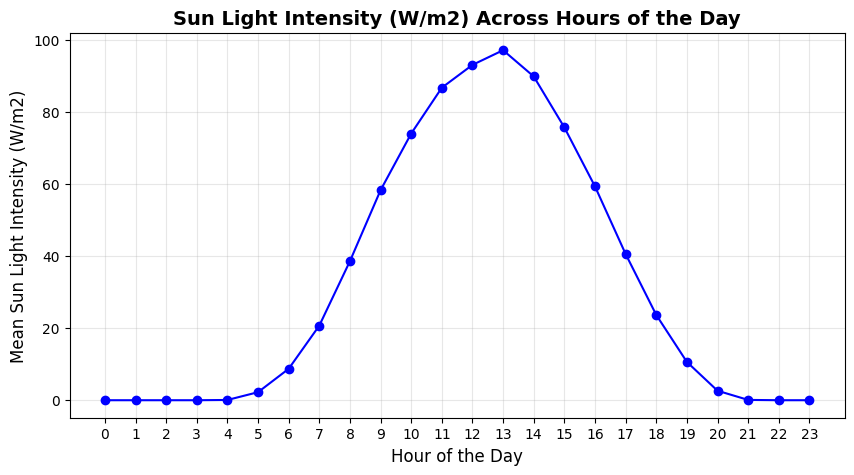

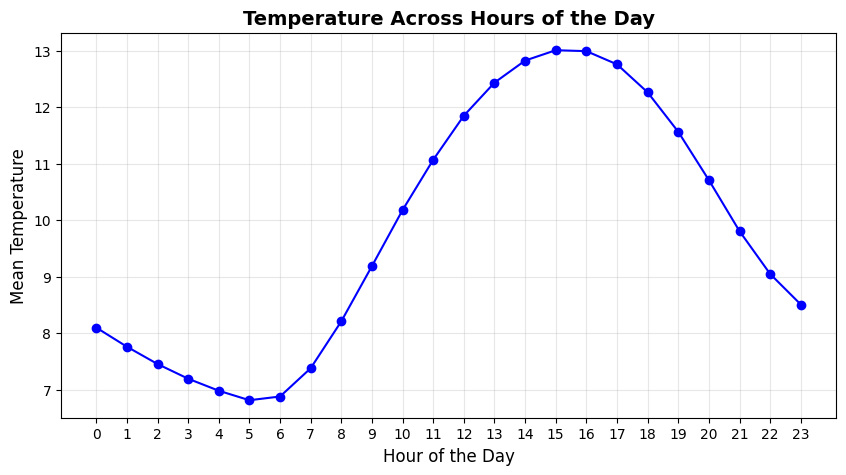

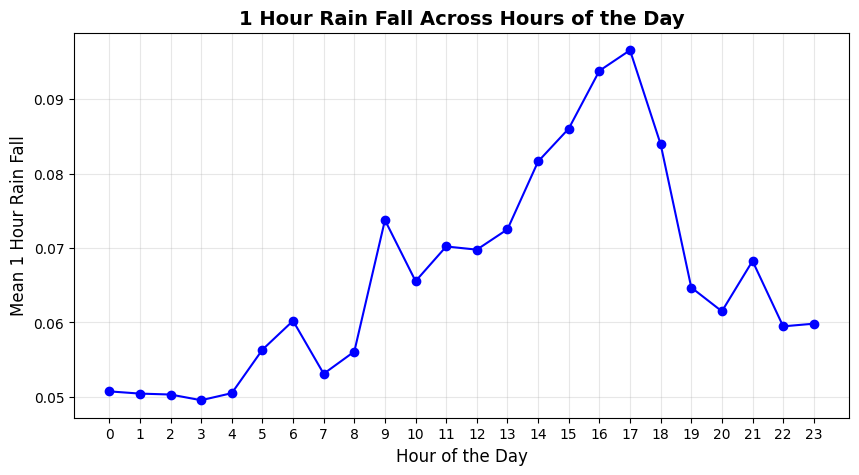

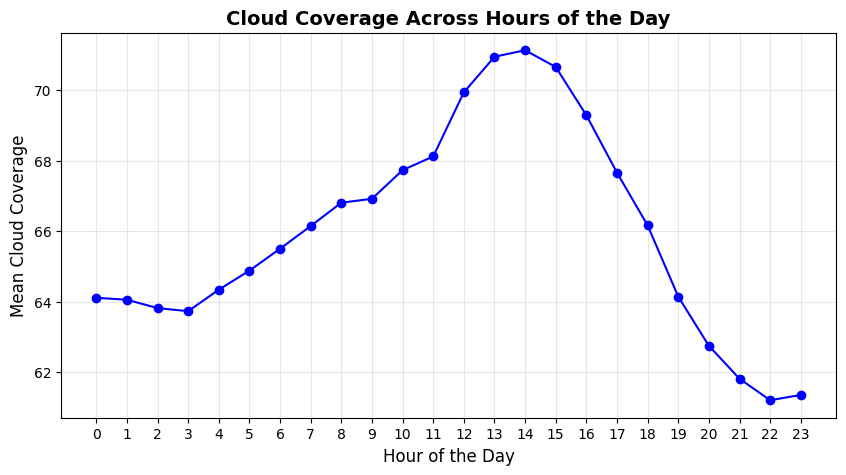

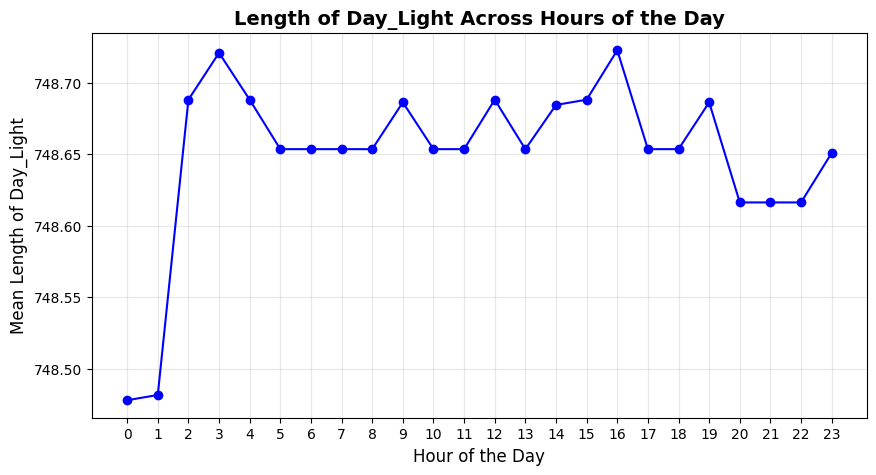

In [51]:
import matplotlib.pyplot as plt

for col in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(hourly_avg.index, hourly_avg[col], marker='o', linestyle='-', color='blue')
    plt.title(f'{col} Across Hours of the Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel(f'Mean {col}', fontsize=12)
    plt.xticks(range(0, 24))  # Show all 24 hours
    plt.grid(alpha=0.3)
    plt.show()


CHECKING OUTLIERS

In [55]:
rolling_mean = df['Energy Captured[Wh]'].rolling(window=5, center=True).mean()
rolling_std = df['Energy Captured[Wh]'].rolling(window=5, center=True).std()
outliers = abs(df['Energy Captured[Wh]'] - rolling_mean) > 3 * rolling_std


In [57]:
print(df[outliers])

Empty DataFrame
Columns: [Energy Captured[Wh], Sun Light Intensity (W/m2), Temperature, 1 Hour Rain Fall, Cloud Coverage, Length of Day_Light, hour]
Index: []


FEATURE ENGINEERING : TIME BASED 

In [58]:
df['hour'] = df.index.hour           
df['day_of_week'] = df.index.dayofweek  
df['month'] = df.index.month     
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int) 


In [60]:
df['Energy_Rolling_1h'] = df['Energy Captured[Wh]'].rolling(window=4).mean()


In [65]:
correlation = df.corr(numeric_only=True)['Energy Captured[Wh]'].sort_values(ascending=False)
print(correlation)


Energy Captured[Wh]           1.000000
Energy_Rolling_1h             0.968368
Sun Light Intensity (W/m2)    0.914572
Temperature                   0.378554
Length of Day_Light           0.280694
hour                          0.077460
is_weekend                    0.006312
day_of_week                   0.000262
month                        -0.049365
1 Hour Rain Fall             -0.059883
Cloud Coverage               -0.190169
Name: Energy Captured[Wh], dtype: float64


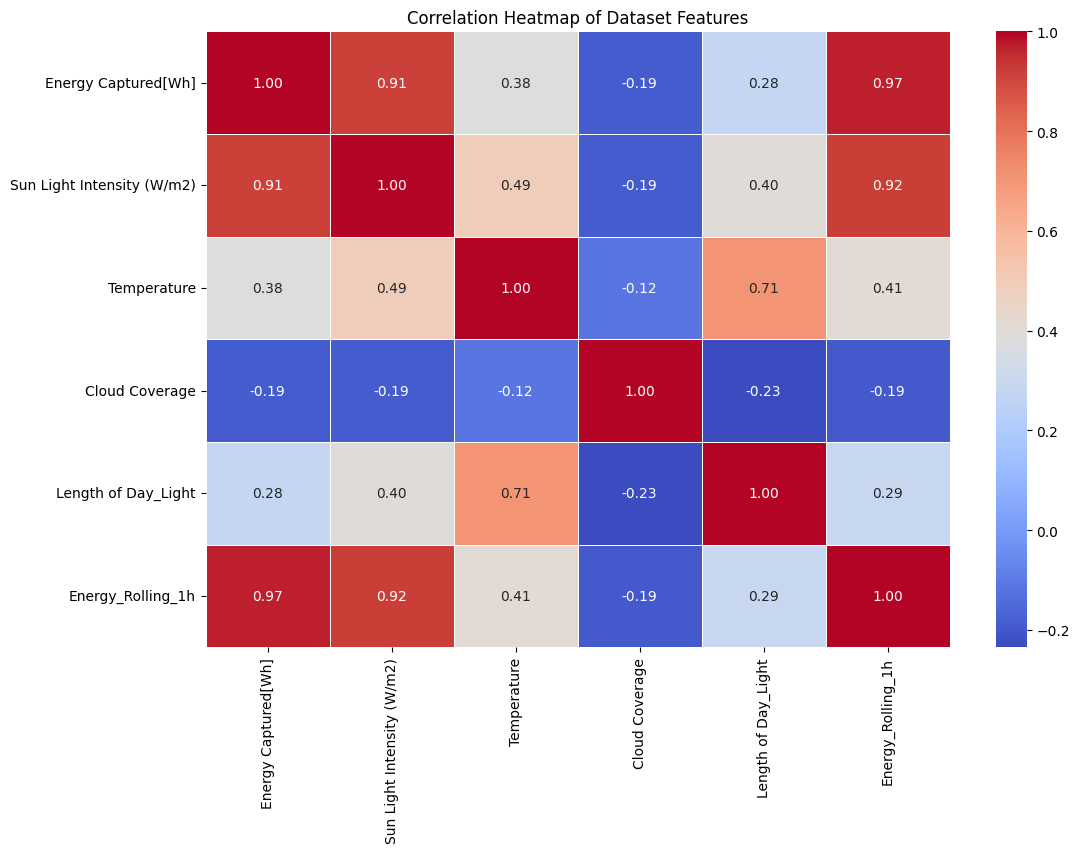

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Dataset Features")
plt.show()


DROPPING COLUMNS THAT ARE WEEKLY CORRELATED

In [66]:
low_corr_features = correlation[abs(correlation) < 0.1].index
df = df.drop(columns=low_corr_features)


In [78]:
df['Energy_Rolling_1h'] = df['Energy_Rolling_1h'].fillna(0)

BUILDING A REGRESSION MODEL

In [80]:
target = 'Energy Captured[Wh]'
X = df.drop(columns=[target])
y = df[target]

TRAIN TEST SPLIT WITH RATIO OF 0.2

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STANDARDIZING AND EVALUATING THE MODEL PERFORMANCE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.944049587398896
Linear Regression RMSE: 248.7882764877141


RANDOM FOREST MODEL

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R²: 0.9496860604495524
Random Forest RMSE: 235.92416494526384


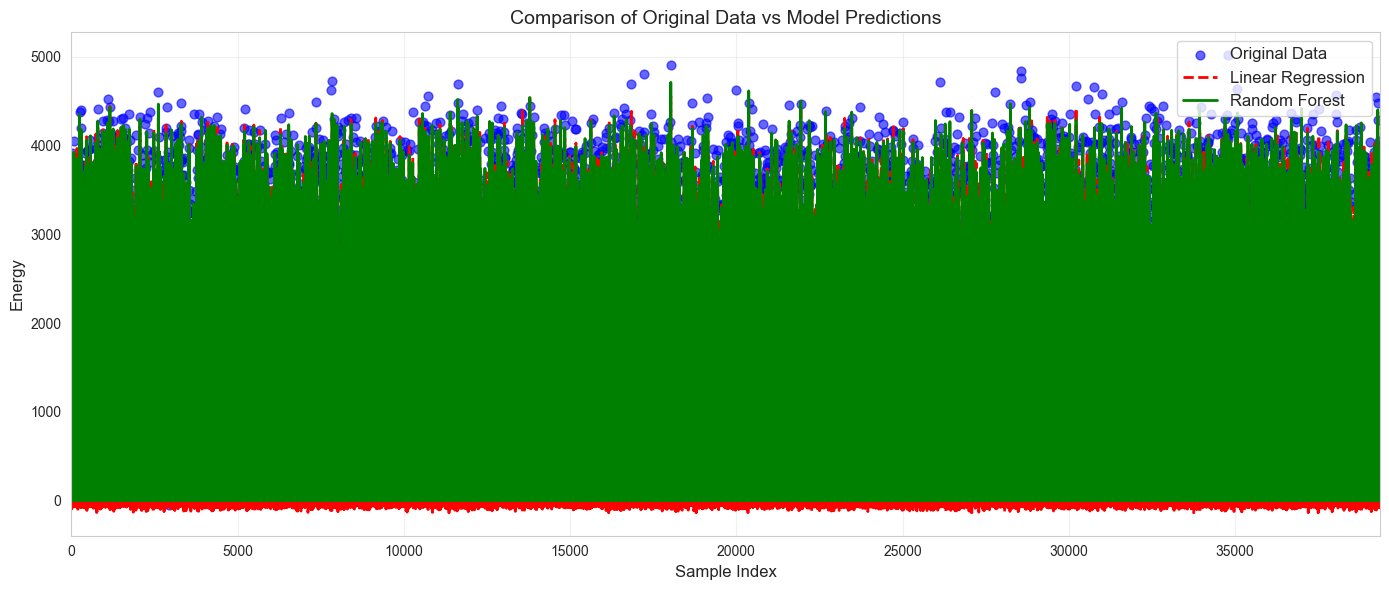

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14,6))

plt.scatter(range(len(y_test)), y_test, label='Original Data', color='blue', alpha=0.6, s=40)

plt.plot(y_pred_lr, label='Linear Regression', color='red', linewidth=2, linestyle='--')

plt.plot(y_pred_rf, label='Random Forest', color='green', linewidth=2)

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.title('Comparison of Original Data vs Model Predictions', fontsize=14)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

plt.xlim(0, len(y_test))  

plt.show()


TRAIN TEST SPLIT WITH RATIO OF 0.25

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

target1 = 'Energy Captured[Wh]'
X1 = df.drop(columns=[target1])
y1 = df[target1]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.25, random_state=42
)

scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

lr1 = LinearRegression()
lr1.fit(X_train_scaled1, y_train1)

y_pred_lr1 = lr1.predict(X_test_scaled1)

print("Linear Regression R²:", r2_score(y_test1, y_pred_lr1))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test1, y_pred_lr1)))


Linear Regression R²: 0.9434305479757952
Linear Regression RMSE: 250.49974486661117


RANDOM FOREST REGRESSOR

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train1.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train1.columns)


rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(X_train_scaled, y_train1)


y_pred_rf1 = rf1.predict(X_test_scaled)

print("Random Forest R²:", r2_score(y_test1, y_pred_rf1))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test1, y_pred_rf1)))


Random Forest R²: 0.9494440707877781
Random Forest RMSE: 236.81126105633325


In [97]:
df.head()

,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,Cloud Coverage,Length of Day_Light,Energy_Rolling_1h
Time,,,,,,
2017-01-01 00:00:00,0.0,0.0,1.6,100.0,450.0,0.0
2017-01-01 00:15:00,0.0,0.0,1.6,100.0,450.0,0.0
2017-01-01 00:30:00,0.0,0.0,1.6,100.0,450.0,0.0
2017-01-01 00:45:00,0.0,0.0,1.6,100.0,450.0,0.0
2017-01-01 01:00:00,0.0,0.0,1.7,100.0,450.0,0.0


CALCULATING ALL THE JANUARY MONTH ENERGY PRODUCTION FROM ALL THE PREVIOUS YEARS

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year

jan_data = df[df['month'] == 1]

jan_averages = jan_data.groupby('year')['Energy Captured[Wh]'].mean().reset_index()

print(jan_averages)


   year  Energy Captured[Wh]
0  2017           180.547686
1  2018           125.400000
2  2019           117.248992
3  2020           122.447245
4  2021            83.167339
5  2022           161.141204


PREDICTING THE JAN 2026 ENERGY CAPTURED BASED ON PREVIOUS DATA

In [109]:
df_january = df[df['month'] == 1]

avg_features = df_january[['Sun Light Intensity (W/m2)',
                           'Temperature',
                           'Cloud Coverage',
                           'Length of Day_Light',
                           'Energy_Rolling_1h']].mean()
print(avg_features)


Sun Light Intensity (W/m2)      5.501943
Temperature                     1.293498
Cloud Coverage                 79.317491
Length of Day_Light           486.545053
Energy_Rolling_1h             129.578681
dtype: float64


In [110]:
forecast_jan_2026 = pd.DataFrame({
    'Sun Light Intensity (W/m2)': [5.501943],
    'Temperature': [1.293498],                                
    'Cloud Coverage': [79.317491],               
    'Length of Day_Light': [486.545053],   
    'Energy_Rolling_1h' : [129.578681]        
})

forecast_rf = rf.predict(forecast_jan_2026)[0]

print("Predicted Energy Captured [Wh] for Jan 2026 (Random Forest):", forecast_rf)


Predicted Energy Captured [Wh] for Jan 2026 (Random Forest): 131.17


In [113]:
forecast_row = pd.DataFrame({
    'year': [2026],
    'Energy Captured[Wh]': [forecast_rf]
})

jan_averages = pd.concat([jan_averages, forecast_row], ignore_index=True)

print(jan_averages)


   year  Energy Captured[Wh]
0  2017           180.547686
1  2018           125.400000
2  2019           117.248992
3  2020           122.447245
4  2021            83.167339
5  2022           161.141204
6  2026           131.170000
